In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Problema 1

In [20]:
def imagen_colores(imagen_path, color):
    # Carga la imagen
    imagen = cv2.imread(imagen_path)

    zeros = np.zeros_like(imagen)
    
    if color == 1:
        # Activa solo el color azul
        nueva_imagen = cv2.merge([imagen[:, :, 0], zeros[:, :, 1], zeros[:, :, 2]])
    elif color == 2:
        # Activa solo el color verde
        nueva_imagen = cv2.merge([zeros[:, :, 0], imagen[:, :, 1], zeros[:, :, 2]])
    elif color == 3:
        # Activa solo el color rojo
        nueva_imagen = cv2.merge([zeros[:, :, 0], zeros[:, :, 1], imagen[:, :, 2]])
    elif color == 10:
        # Activa solo los colores rojo y verde
        nueva_imagen = cv2.merge([zeros[:, :, 0], imagen[:, :, 1], imagen[:, :, 2]])
    elif color == 20:
        # Activa solo los colores verde y azul
        nueva_imagen = cv2.merge([imagen[:, :, 0], imagen[:, :, 1], zeros[:, :, 2]])
    elif color == 30:
        # Activa solo los colores azul y rojo
        nueva_imagen = cv2.merge([imagen[:, :, 0], zeros[:, :, 1], imagen[:, :, 2]])
    else:
        raise ValueError("El parámetro color debe ser 1, 2, 3, 10, 20, o 30")
    
    return nueva_imagen



In [88]:
nueva_imagen = imagen_colores("imagen_prueba.jpg", 30)
nueva_imagen1 = cv2.cvtColor(nueva_imagen, cv2.COLOR_BGR2RGB)

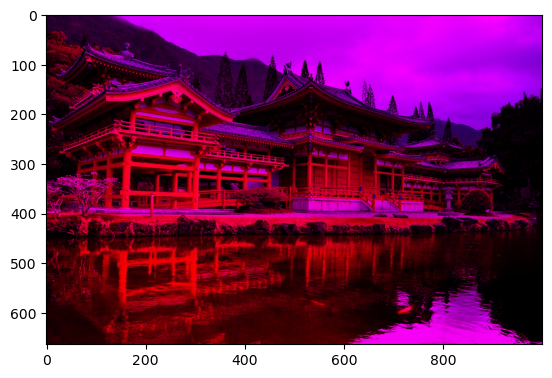

In [93]:
plt.imshow(nueva_imagen1)
plt.show()

In [96]:
cv2.imwrite("azul_rojo.jpg", nueva_imagen)

True

### Problema 2

In [30]:
def imagen_original(imagen_rojo, imagen_verde, imagen_azul):
    # Carga las imágenes en escala de grises
    rojo = cv2.imread(imagen_rojo, cv2.IMREAD_GRAYSCALE)
    verde = cv2.imread(imagen_verde, cv2.IMREAD_GRAYSCALE)
    azul = cv2.imread(imagen_azul, cv2.IMREAD_GRAYSCALE)


    # Combina las imágenes en escala de grises en una sola imagen en color
    imagen_color = cv2.merge([azul, verde, rojo])
    
    return imagen_color


Imagen 1

In [67]:
imagen1_color = imagen_original('imagen1_salida_gray_rojo.jpg', 'imagen1_salida_gray_verde.jpg', 'imagen1_salida_gray_azul.jpg')
imagen1_color_rgb = cv2.cvtColor(imagen1_color, cv2.COLOR_BGR2RGB)

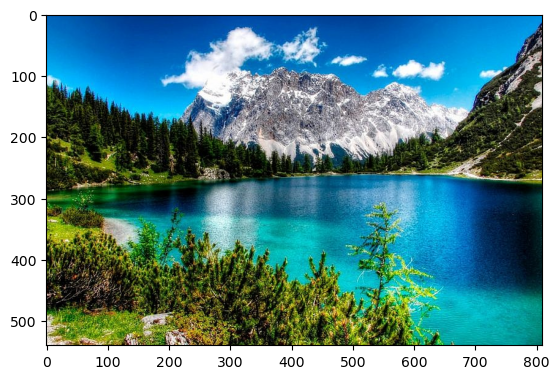

In [69]:
plt.imshow(imagen1_color_rgb)
plt.show()

In [70]:
cv2.imwrite('imagen1_original.jpg', imagen1_color)

True

Imagen 2

In [101]:
imagen2_color = imagen_original('imagen2_salida_gray_rojo.jpg', 'imagen2_salida_gray_verde.jpg', 'imagen2_salida_gray_azul.jpg')
imagen2_color_rgb = cv2.cvtColor(imagen2_color, cv2.COLOR_BGR2RGB)

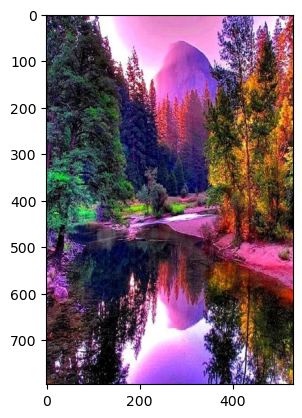

In [104]:
plt.imshow(imagen2_color_rgb)
plt.show()

In [111]:
cv2.imwrite('imagen2_original.jpg', imagen2_color)

True

Perro

In [106]:
perro_color = imagen_original('perro_salida_gray_rojo.jpg', 'perro_salida_gray_verde.jpg', 'perro_salida_gray_azul.jpg')
perro_color_rgb = cv2.cvtColor(perro_color, cv2.COLOR_BGR2RGB)

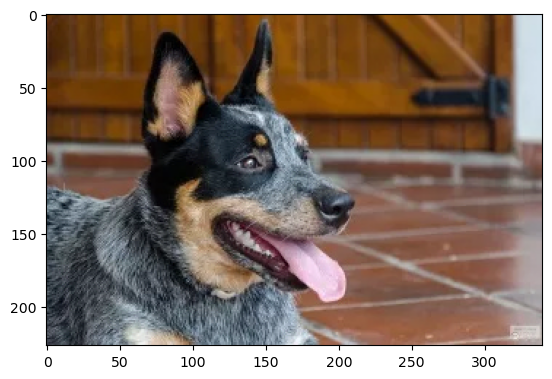

In [109]:
plt.imshow(perro_color_rgb)
plt.show()

In [112]:
cv2.imwrite('perro_original.jpg', perro_color)

True

### Problema 3

In [124]:
def crear_escala_grises(imagen_path):
    # Leer la imagen en color
    imagen_color = cv2.imread(imagen_path)
    
    # Separar los canales de color
    azul_prueba, verde_prueba, rojo_prueba = cv2.split(imagen_color)
    
    return rojo_prueba, verde_prueba, azul_prueba



In [128]:
imagen_prueba = 'imagen_prueba.jpg'

rojo_prueba, verde_prueba, azul_prueba = crear_escala_grises(imagen_prueba)

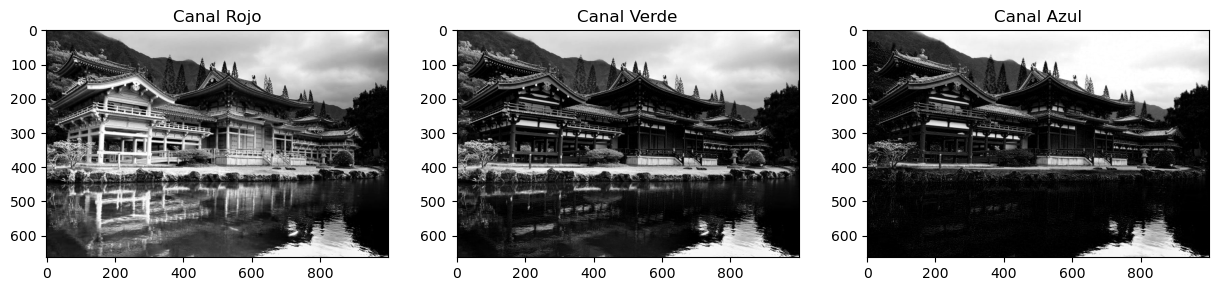

In [139]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.imshow(rojo_prueba, cmap="gray")
plt.title("Canal Rojo")

plt.subplot(1,3,2)
plt.imshow(verde_prueba, cmap="gray")
plt.title("Canal Verde")

plt.subplot(1,3,3)
plt.imshow(azul_prueba, cmap="gray")
plt.title("Canal Azul")

plt.show()

In [131]:
cv2.imwrite('prueba_salida_rojo.jpg', rojo_prueba)
cv2.imwrite('prueba_salida_verde.jpg', verde_prueba)
cv2.imwrite('prueba_salida_azul.jpg', azul_prueba)

True

### Problema 4

In [147]:
def mostrar_histogramas_con_medias(imagen_path):
    # Leer la imagen en color
    imagen_color = cv2.imread(imagen_path)
    
    # Separar los canales de color
    azul, verde, rojo = cv2.split(imagen_color)
    
    # Calcular la escala de grises usando el promedio aritmético
    escala_grises = np.mean(imagen_color, axis=2).astype(np.uint8)
    
    # Función para calcular el histograma
    def calcular_histograma(imagen):
        hist, bins = np.histogram(imagen.flatten(), 256, [0, 256])
        return hist
    
    # Función para calcular la media del histograma
    def calcular_media_histograma(hist):
        valores = np.arange(256)
        media = np.average(valores, weights=hist)
        return media
    
    # Calcular los histogramas
    hist_rojo = calcular_histograma(rojo)
    hist_verde = calcular_histograma(verde)
    hist_azul = calcular_histograma(azul)
    hist_grises = calcular_histograma(escala_grises)
    
    # Calcular las medias de los histogramas
    media_rojo = calcular_media_histograma(hist_rojo)
    media_verde = calcular_media_histograma(hist_verde)
    media_azul = calcular_media_histograma(hist_azul)
    media_grises = calcular_media_histograma(hist_grises)
    
    # Mostrar los histogramas con Matplotlib
    plt.figure(figsize=(14, 8))

    # Histograma del canal rojo
    plt.subplot(2, 2, 1)
    plt.plot(hist_rojo, color='red')
    plt.axvline(x=media_rojo, color='black', linestyle='--')
    plt.title("Histograma Canal Rojo")
    plt.xlim([0, 256])
    
    # Histograma del canal verde
    plt.subplot(2, 2, 2)
    plt.plot(hist_verde, color='green')
    plt.axvline(x=media_verde, color='black', linestyle='--')
    plt.title("Histograma Canal Verde")
    plt.xlim([0, 256])
    
    # Histograma del canal azul
    plt.subplot(2, 2, 3)
    plt.plot(hist_azul, color='blue')
    plt.axvline(x=media_azul, color='black', linestyle='--')
    plt.title("Histograma Canal Azul")
    plt.xlim([0, 256])
    
    # Histograma en escala de grises
    plt.subplot(2, 2, 4)
    plt.plot(hist_grises, color='black')
    plt.axvline(x=media_grises, color='red', linestyle='--')
    plt.title("Histograma Escala de Grises")
    plt.xlim([0, 256])
    
    plt.tight_layout()
    plt.show()




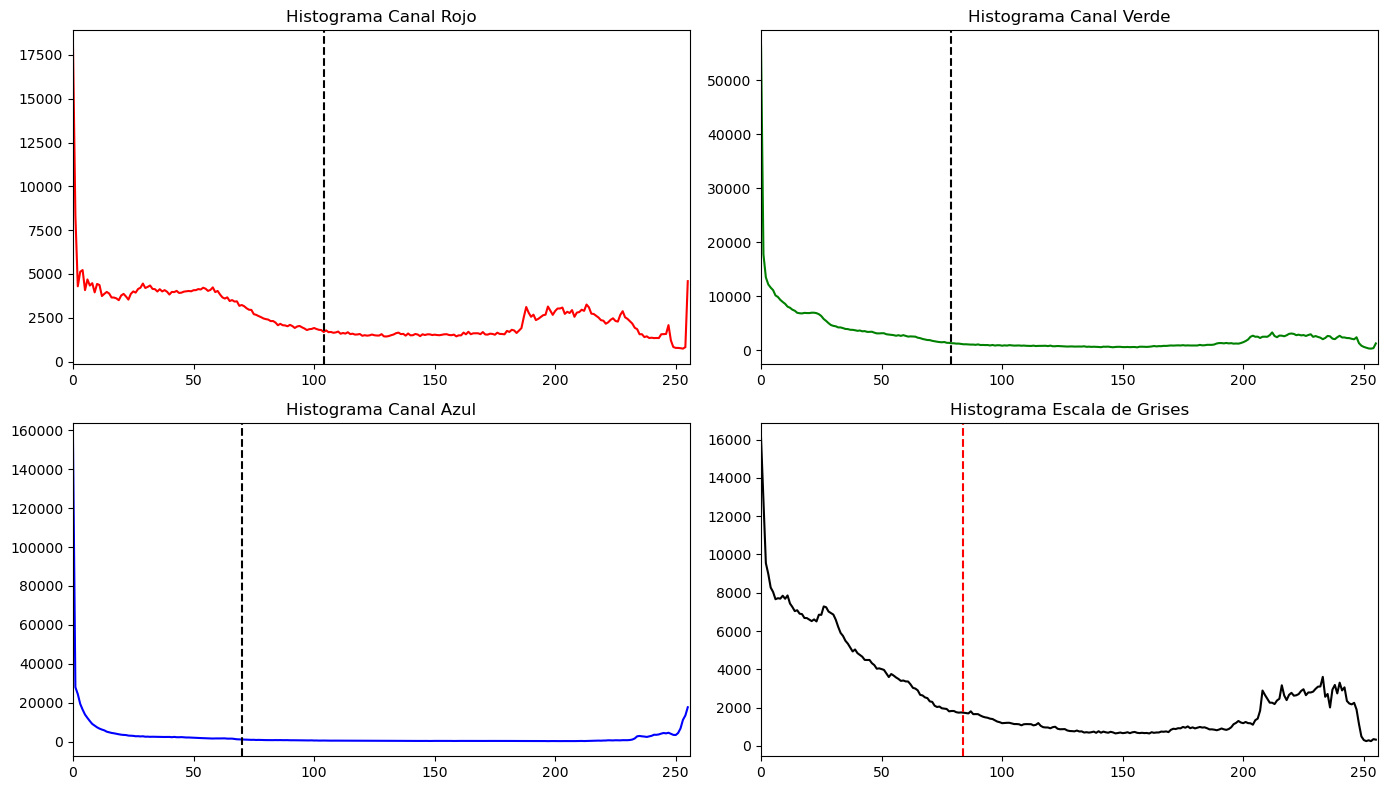

In [148]:
imagen_path = 'imagen_prueba.jpg'
mostrar_histogramas_con_medias(imagen_path)

### Problema 5

In [151]:
def convertir_a_grises_ponderado(imagen_path):
    # Leer la imagen en color
    imagen_color = cv2.imread(imagen_path)
      
    # Separar los canales de color
    azul, verde, rojo = cv2.split(imagen_color)
    
    # Convertir a escala de grises ponderada
    escala_grises_ponderada = 0.299 * rojo + 0.587 * verde + 0.114 * azul
    
    # Asegurarse de que los valores están en el rango adecuado (0-255)
    escala_grises_ponderada = np.clip(escala_grises_ponderada, 0, 255).astype(np.uint8)
    
    return escala_grises_ponderada

def mostrar_imagenes(imagen_color, imagen_grises):
    # Mostrar la imagen original y la imagen en escala de grises ponderada
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")

    
    plt.subplot(1, 2, 2)
    plt.imshow(imagen_grises, cmap='gray')
    plt.title("Imagen en Escala de Grises Ponderada")

    
    plt.tight_layout()
    plt.show()



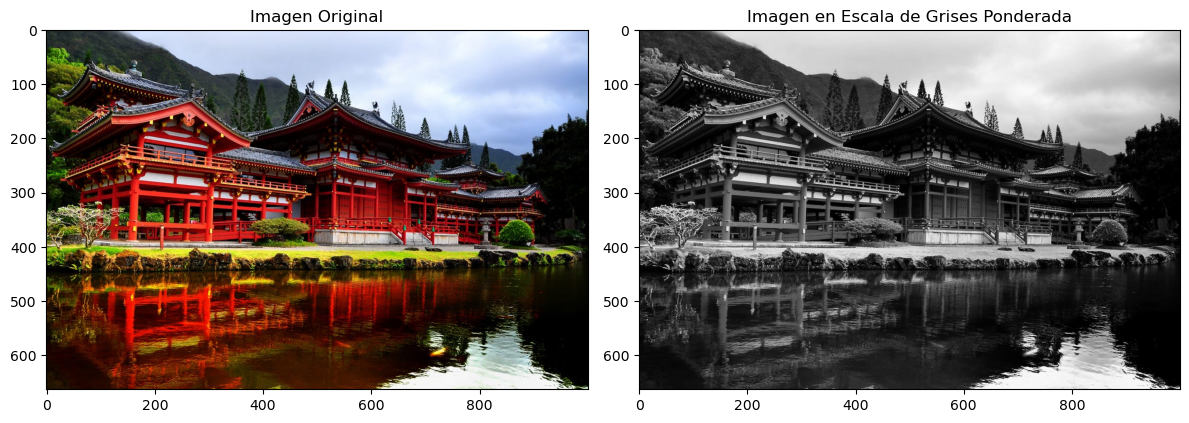

In [152]:
# Ejemplo de uso:
imagen_path = 'imagen_prueba.jpg'
imagen_color = cv2.imread(imagen_path)
imagen_grises_ponderada = convertir_a_grises_ponderado(imagen_path)

mostrar_imagenes(imagen_color, imagen_grises_ponderada)

### Problema 6

#### Espacio de Color HSV
El espacio de color HSV (Hue, Saturation, Value) es una representación del color que describe los colores en términos de su tono (hue), saturación (saturation) y valor (value, también conocido como brillo o luminosidad). Este modelo es más intuitivo para los humanos porque se asemeja más a cómo percibimos y describimos los colores en la vida cotidiana. 

1. Hue (Matiz): Representa el tipo de color y se mide en grados de 0 a 360 en una rueda de colores.

    - 0° es rojo.   
    - 120° es verde.
    - 240° es azul.

2. Saturation (Saturación): Indica la pureza del color (o cuán "intenso" es el color). Se mide en porcentaje de 0% a 100%.

    - 0% es un tono de gris.
    - 100% es el color más puro (sin mezcla de blanco).

3. Value (Valor): Mide el brillo del color, desde 0% (negro) hasta 100% (el color completo).

#### Mapeo de Colores al Espacio HSV
Para mapear colores del espacio RGB al espacio HSV, se siguen varios pasos de conversión matemática. A continuación se muestra el proceso de manera simplificada:


Si 𝐻 resulta ser negativo, se le suma 360 para asegurarse de que está en el rango de 0 a 360 grados.